# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Check the Version of TensorFlow and Access to GPU

This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

## Train Agent on Pendulum Task
Use Pendulum task from OpenAI gym.

In [1]:
import matplotlib.pyplot as plt

# you must include '%matplotlib notebook' for this to work
##%matplotlib notebook

#pendulum values
#time_limit = 100
#y1_lower = -50
#y1_upper = 0
#y2_lower = 0
#y2_upper = 20

# quadcopter values
time_limit = 5
y1_lower = -200
y1_upper = 30
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(fig, sub1, sub2, x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

def plt_clear(fig):
    fig.clear()

def plt_init():
    # create plots
    fig, sub1= plt.subplots(1,1)
    sub2 = sub1.twinx()

    # set plot boundaries
    sub1.set_xlim(0, time_limit) # this is typically time
    sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
    sub2.set_xlim(0, time_limit) # time, again
    sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

    # set labels and colors for the axes
    sub1.set_xlabel('time (s)', color='k') 
    sub1.set_ylabel('y1-axis label', color='g')
    sub1.tick_params(axis='x', colors='k')
    sub1.tick_params(axis='y', colors="g")

    sub2.set_ylabel('y2-axis label', color='b') 
    sub2.tick_params(axis='y', colors='b')
    
    return fig, sub1, sub2
    

In [ ]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import gym
import sys
from agents.agent import DDPG
from pendulum_task import PendulumTask

num_episodes = 1000
task = PendulumTask()
agent = DDPG(task) 

display_freq = 50
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    step = 0
    total_reward = 0
    
    while True:
        step += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        # within the episode loop
        if display_graph:
            x.append(step) # time
            y1.append(reward) # y-axis 1 values
            y2.append(next_state[0]) # y-axis 2 values
            
            if step % display_step_freq == 0:
                plt_dynamic(fig, sub1, sub2, x, y1, y2)
            
            #print(task.current_steps)
            #print(f'Episode number {i_episode}')
            #print(f'action {action}, reward {reward}, next_state {next_state}, done {done}')
        #    print(f'Plot values - time {task.sim.time}, reward {reward}, z {task.sim.pose[2]}')
        #if done:
        #    print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
        #        i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        #    break
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
        #    if (episode % display_freq == 0) and (display_graph == True):
        #               plt_dynamic(x, y1, y2)
            break

    #if display_graph:  
    #    plt_clear(fig)
    #sys.stdout.flush()

In [ ]:
init_pose = [0., 0., 10., 0., 0., 0.]
inital_velocity = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]

In [ ]:
import matplotlib as plt

# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

time_limit = 1
y1_lower = -10
y1_upper = 10
y2_lower = 0
y2_upper = 20

# generate plot function
def plt_dynamic(x, y1, y2, color_y1='g', color_y2='b'):
   sub1.plot(x, y1, color_y1)
   sub2.plot(x, y2, color_y2)
   fig.canvas.draw()

# create plots
fig, sub1= plt.subplots(1,1)
sub2 = sub1.twinx()

# set plot boundaries
sub1.set_xlim(0, time_limit) # this is typically time
sub1.set_ylim(y1_lower, y1_upper) # limits to your y1
sub2.set_xlim(0, time_limit) # time, again
sub2.set_ylim(y2_lower, y2_upper) # limits to your y2

# set labels and colors for the axes
sub1.set_xlabel('time (s)', color='k') 
sub1.set_ylabel('y1-axis label', color='g')
sub1.tick_params(axis='x', colors='k')
sub1.tick_params(axis='y', colors="g")

sub2.set_ylabel('y2-axis label', color='b') 
sub2.tick_params(axis='y', colors='b')

In [ ]:
x, y1, y2 = [], [], [] 

for i in range(100):
    x.append(i)
    y1.append(i)
    y2.append(2 * i)
    plt_dynamic(x, y1, y2)

Using TensorFlow backend.


Episode =    1, total reward = 1243.339
Episode =    2, total reward = 1263.987
Episode =    3, total reward = 1011.418
Episode =    4, total reward = 1012.643
Episode =    5, total reward = 1819.083
Episode =    6, total reward = 2407.871
Episode =    7, total reward = 2357.690
Episode =    8, total reward = 2169.554
Episode =    9, total reward = 2327.496
Episode =   10, total reward = 2098.352
Episode =   11, total reward = 2308.532
Episode =   12, total reward = 2328.147
Episode =   13, total reward = 2554.564
Episode =   14, total reward = 2195.135
Episode =   15, total reward = 2208.223
Episode =   16, total reward = 2154.088
Episode =   17, total reward = 2742.527
Episode =   18, total reward = 2234.361
Episode =   19, total reward = 2407.554


<IPython.core.display.Javascript object>


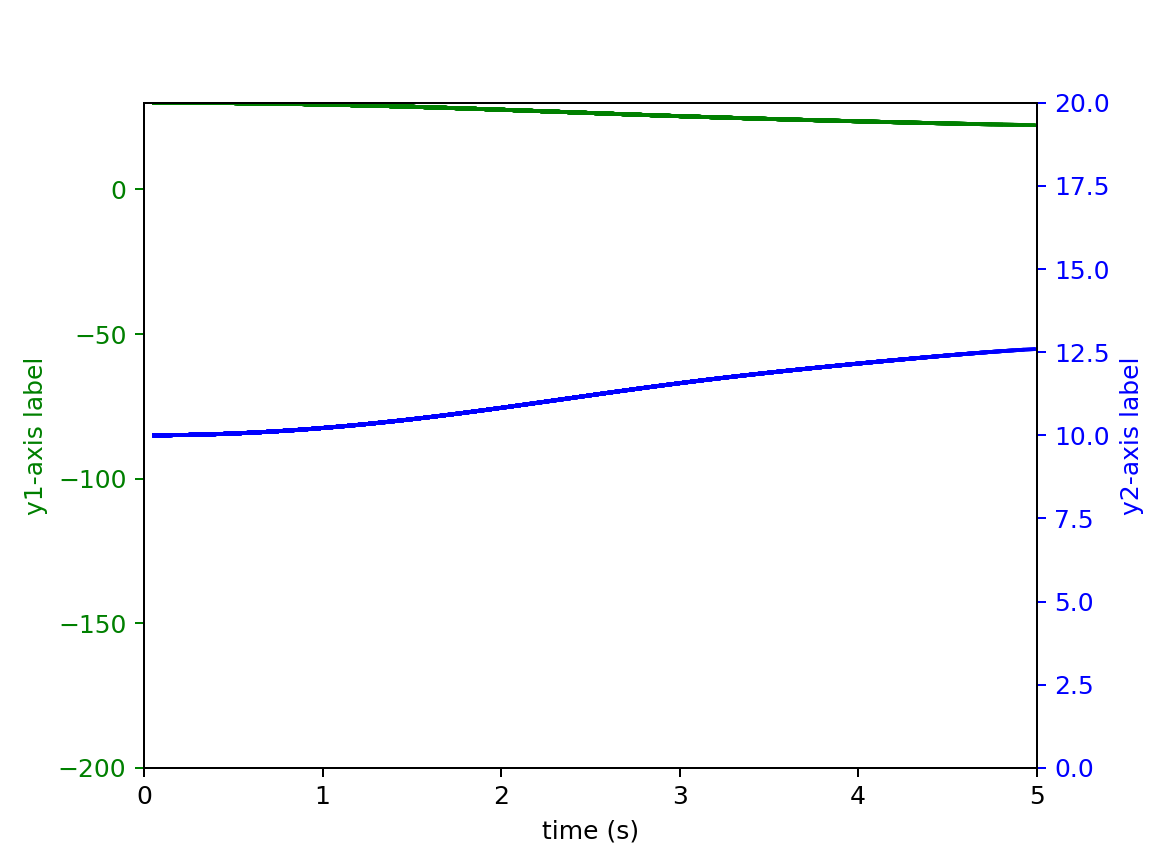

Episode =   20, total reward = 2211.368
Episode =   21, total reward = 2346.960
Episode =   22, total reward = 2311.433
Episode =   23, total reward = 2013.534
Episode =   24, total reward = 885.549
Episode =   25, total reward = 1725.753
Episode =   26, total reward = 2090.803
Episode =   27, total reward = 2099.847
Episode =   28, total reward = 2360.492
Episode =   29, total reward = 2118.558
Episode =   30, total reward = 2286.356
Episode =   31, total reward = 2225.521
Episode =   32, total reward = 2161.721
Episode =   33, total reward = 2211.701
Episode =   34, total reward = 2202.079
Episode =   35, total reward = 2091.278
Episode =   36, total reward = 2423.478
Episode =   37, total reward = 2092.384
Episode =   38, total reward = 1937.283
Episode =   39, total reward = 927.081


<IPython.core.display.Javascript object>


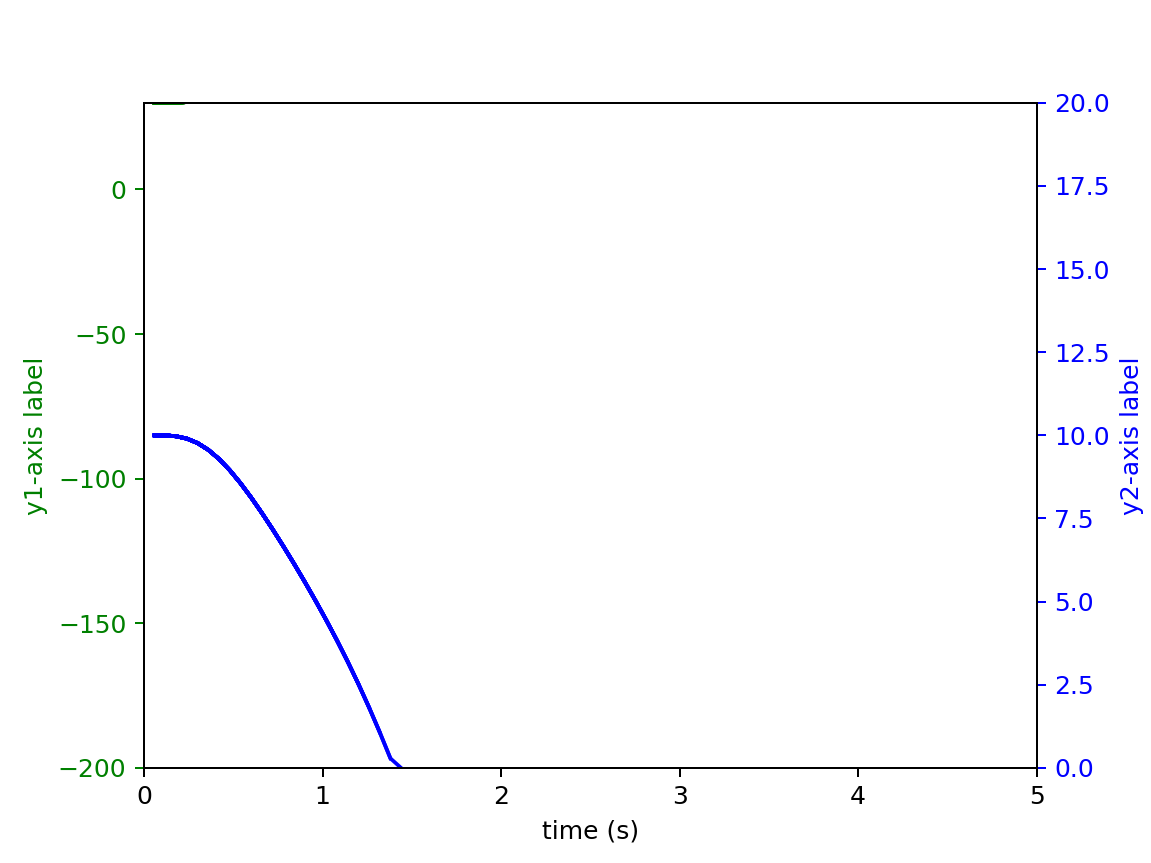

Episode =   40, total reward = 981.159
Episode =   41, total reward = 927.131
Episode =   42, total reward = 985.243
Episode =   43, total reward = 927.422
Episode =   44, total reward = 1077.409
Episode =   45, total reward = 928.730
Episode =   46, total reward = 980.170
Episode =   47, total reward = 976.588
Episode =   48, total reward = 982.149
Episode =   49, total reward = 988.688
Episode =   50, total reward = 983.412
Episode =   51, total reward = 879.100
Episode =   52, total reward = 932.152
Episode =   53, total reward = 982.322
Episode =   54, total reward = 938.015
Episode =   55, total reward = 975.162
Episode =   56, total reward = 929.599
Episode =   57, total reward = 928.819
Episode =   58, total reward = 980.146
Episode =   59, total reward = 979.538


<IPython.core.display.Javascript object>


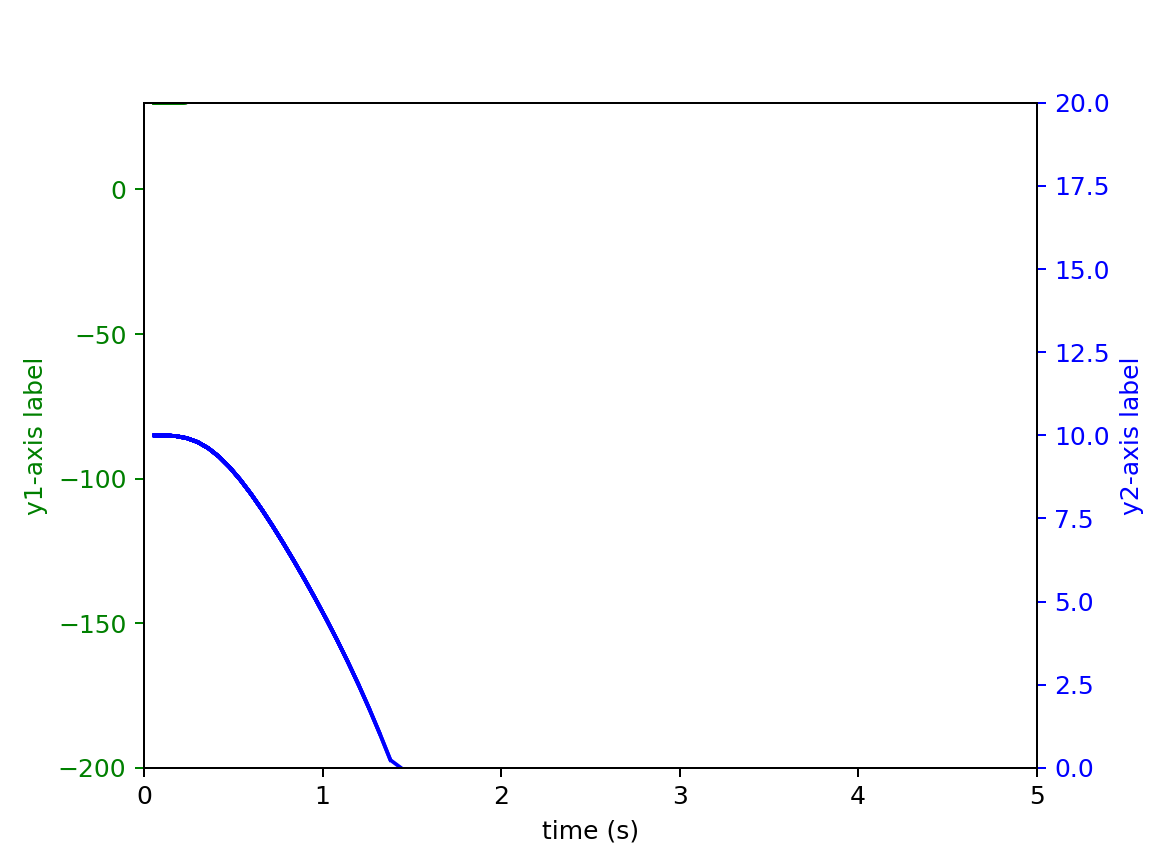

Episode =   60, total reward = 978.555
Episode =   61, total reward = 975.298
Episode =   62, total reward = 933.891
Episode =   63, total reward = 932.072
Episode =   64, total reward = 932.907
Episode =   65, total reward = 978.365
Episode =   66, total reward = 1027.983
Episode =   67, total reward = 923.001
Episode =   68, total reward = 925.089
Episode =   69, total reward = 1016.520
Episode =   70, total reward = 968.087
Episode =   71, total reward = 981.719
Episode =   72, total reward = 925.717
Episode =   73, total reward = 978.192
Episode =   74, total reward = 933.678
Episode =   75, total reward = 931.888
Episode =   76, total reward = 972.542
Episode =   77, total reward = 973.944
Episode =   78, total reward = 974.664
Episode =   79, total reward = 975.326


<IPython.core.display.Javascript object>


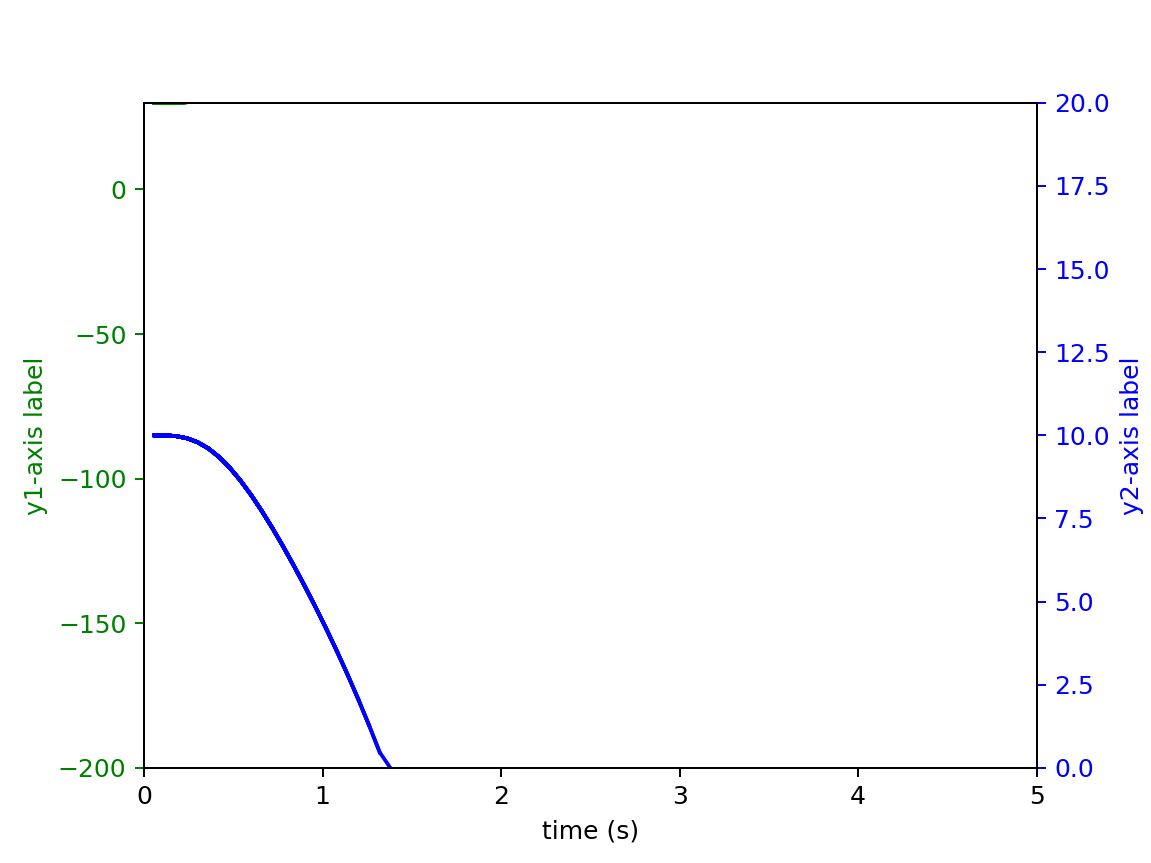

Episode =   80, total reward = 929.680
Episode =   81, total reward = 933.111
Episode =   82, total reward = 927.034
Episode =   83, total reward = 926.270
Episode =   84, total reward = 926.882
Episode =   85, total reward = 933.387
Episode =   86, total reward = 928.285
Episode =   87, total reward = 985.000
Episode =   88, total reward = 930.867
Episode =   89, total reward = 1100.638
Episode =   90, total reward = 1102.878
Episode =   91, total reward = 1093.209
Episode =   92, total reward = 1113.872
Episode =   93, total reward = 1107.273
Episode =   94, total reward = 1107.169
Episode =   95, total reward = 1103.164
Episode =   96, total reward = 1100.775
Episode =   97, total reward = 1056.619
Episode =   98, total reward = 1054.925
Episode =   99, total reward = 1107.793


<IPython.core.display.Javascript object>


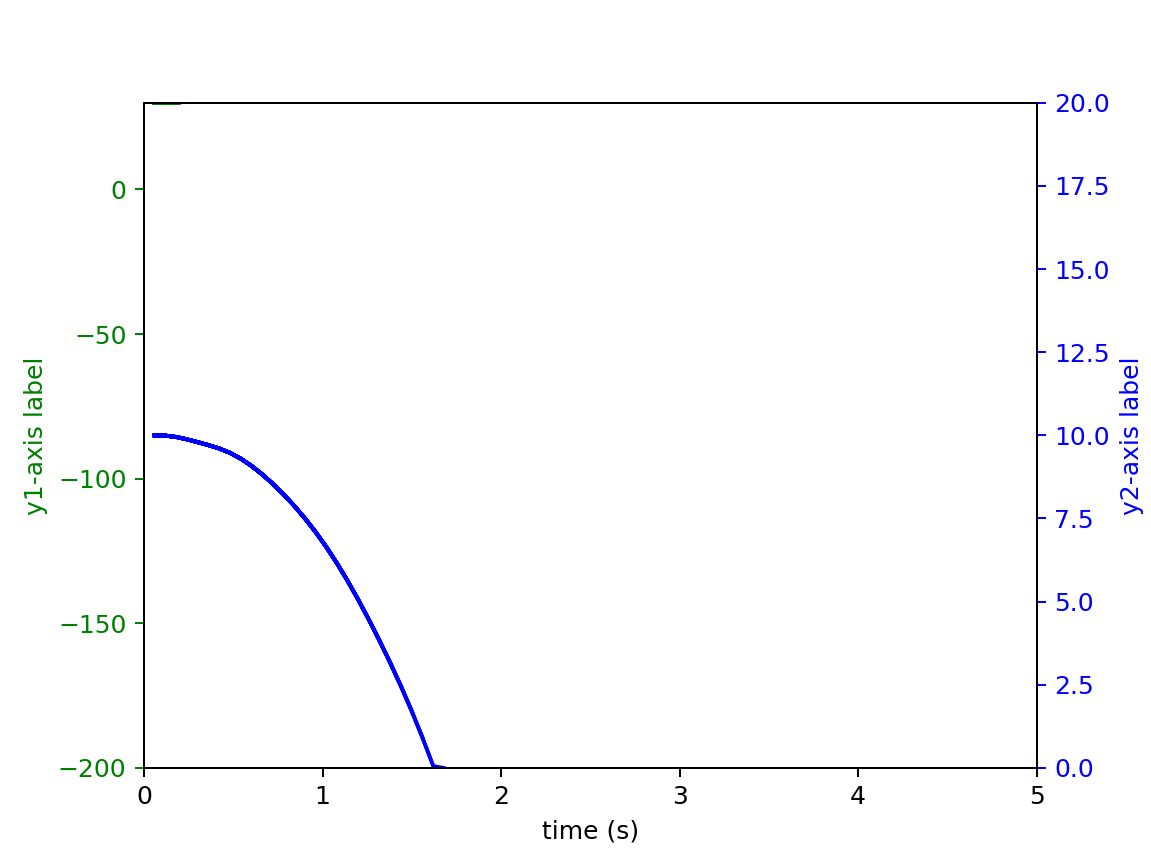

Episode =  100, total reward = 1115.077
Episode =  101, total reward = 1100.825
Episode =  102, total reward = 1061.453
Episode =  103, total reward = 1108.760
Episode =  104, total reward = 1145.903
Episode =  105, total reward = 1137.133
Episode =  106, total reward = 1010.951
Episode =  107, total reward = 1011.138
Episode =  108, total reward = 1015.018
Episode =  109, total reward = 1010.525
Episode =  110, total reward = 1006.980
Episode =  111, total reward = 1014.209
Episode =  112, total reward = 1008.602
Episode =  113, total reward = 961.896
Episode =  114, total reward = 959.347
Episode =  115, total reward = 1008.302
Episode =  116, total reward = 1055.271
Episode =  117, total reward = 1370.521
Episode =  118, total reward = 1367.122
Episode =  119, total reward = 1362.978


<IPython.core.display.Javascript object>


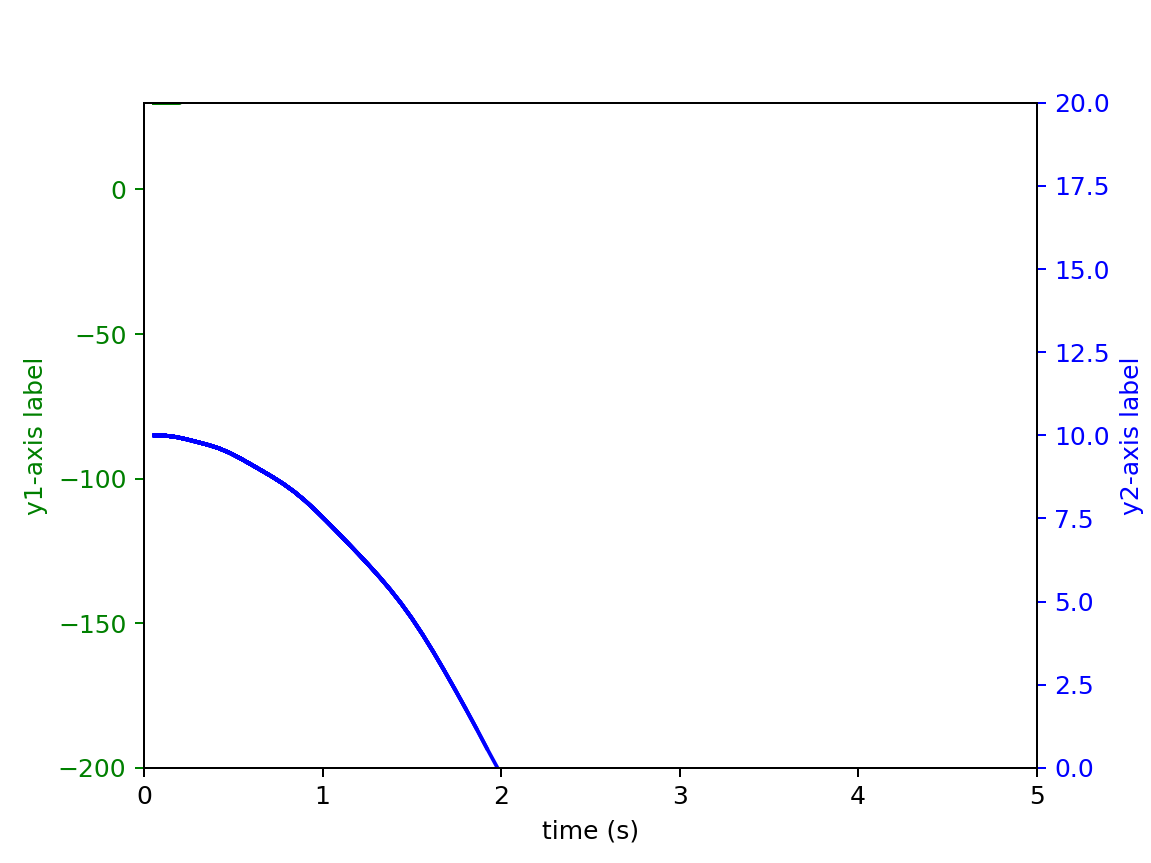

Episode =  120, total reward = 1316.059
Episode =  121, total reward = 1290.576
Episode =  122, total reward = 1372.554
Episode =  123, total reward = 1359.846
Episode =  124, total reward = 1359.083
Episode =  125, total reward = 1361.333
Episode =  126, total reward = 1364.088
Episode =  127, total reward = 1360.694
Episode =  128, total reward = 1361.945
Episode =  129, total reward = 1364.152
Episode =  130, total reward = 1369.759
Episode =  131, total reward = 1360.297
Episode =  132, total reward = 1365.086
Episode =  133, total reward = 1363.570
Episode =  134, total reward = 1362.575
Episode =  135, total reward = 1360.407
Episode =  136, total reward = 1360.152
Episode =  137, total reward = 1359.797
Episode =  138, total reward = 1368.979
Episode =  139, total reward = 1359.701


<IPython.core.display.Javascript object>


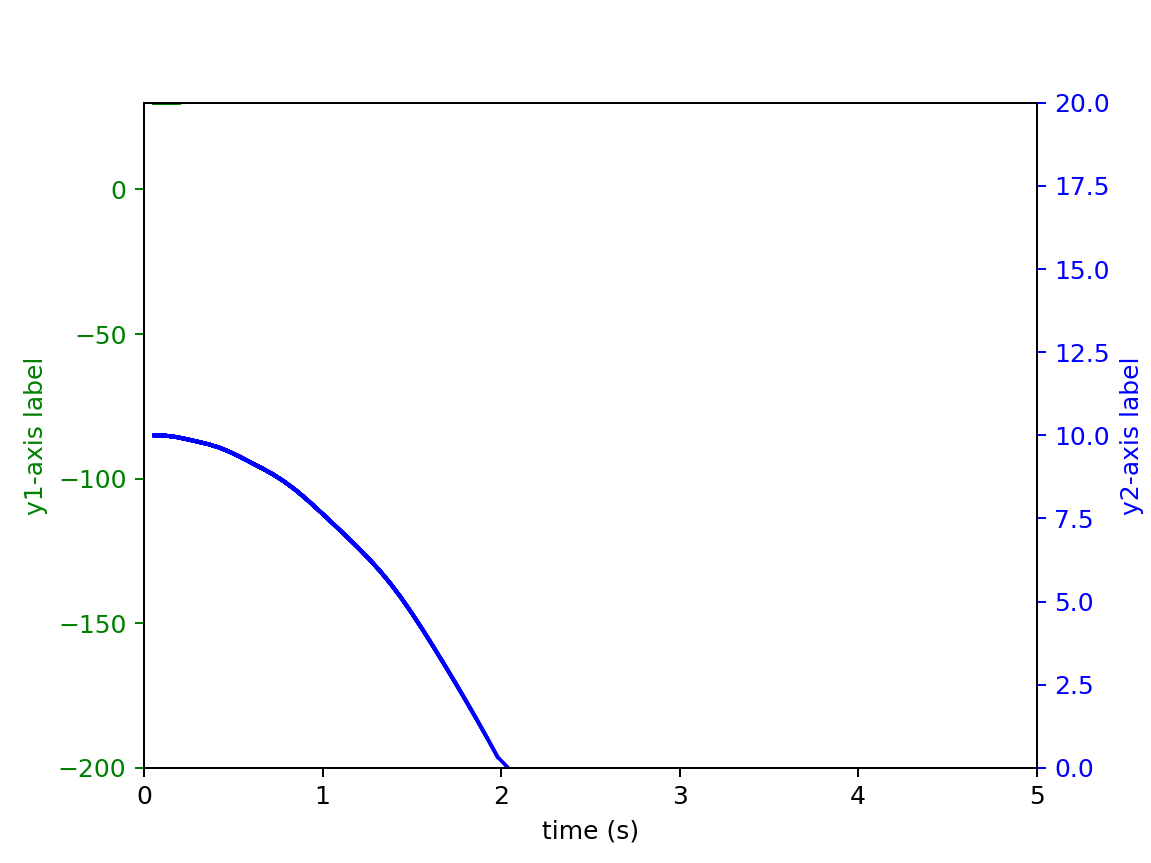

Episode =  140, total reward = 1363.979
Episode =  141, total reward = 1236.361
Episode =  142, total reward = 1365.659
Episode =  143, total reward = 1360.956
Episode =  144, total reward = 1359.292
Episode =  145, total reward = 1358.199
Episode =  146, total reward = 1357.821
Episode =  147, total reward = 1309.696
Episode =  148, total reward = 1360.111
Episode =  149, total reward = 1366.842
Episode =  150, total reward = 1361.182
Episode =  151, total reward = 1361.832
Episode =  152, total reward = 1362.078
Episode =  153, total reward = 1363.663
Episode =  154, total reward = 1232.509
Episode =  155, total reward = 1362.312
Episode =  156, total reward = 1360.269
Episode =  157, total reward = 1368.567
Episode =  158, total reward = 1361.547
Episode =  159, total reward = 1367.057


<IPython.core.display.Javascript object>


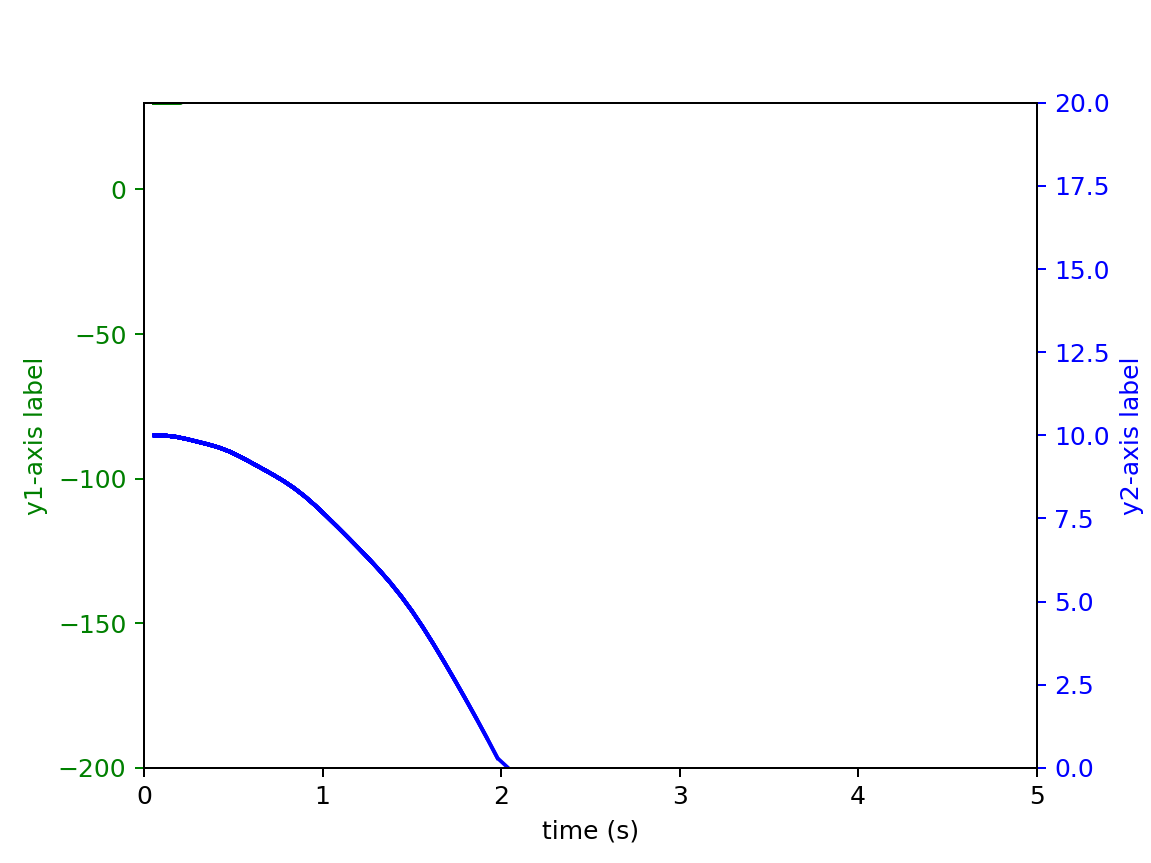

Episode =  160, total reward = 1362.126
Episode =  161, total reward = 1364.270
Episode =  162, total reward = 1326.428
Episode =  163, total reward = 1365.393
Episode =  164, total reward = 1242.616
Episode =  165, total reward = 1360.419
Episode =  166, total reward = 1323.452
Episode =  167, total reward = 1366.368
Episode =  168, total reward = 1366.855
Episode =  169, total reward = 1360.334
Episode =  170, total reward = 1360.308
Episode =  171, total reward = 1360.100
Episode =  172, total reward = 1361.772
Episode =  173, total reward = 1366.083
Episode =  174, total reward = 1364.354
Episode =  175, total reward = 1371.500
Episode =  176, total reward = 1315.150
Episode =  177, total reward = 1372.931
Episode =  178, total reward = 1362.104
Episode =  179, total reward = 1362.223


<IPython.core.display.Javascript object>


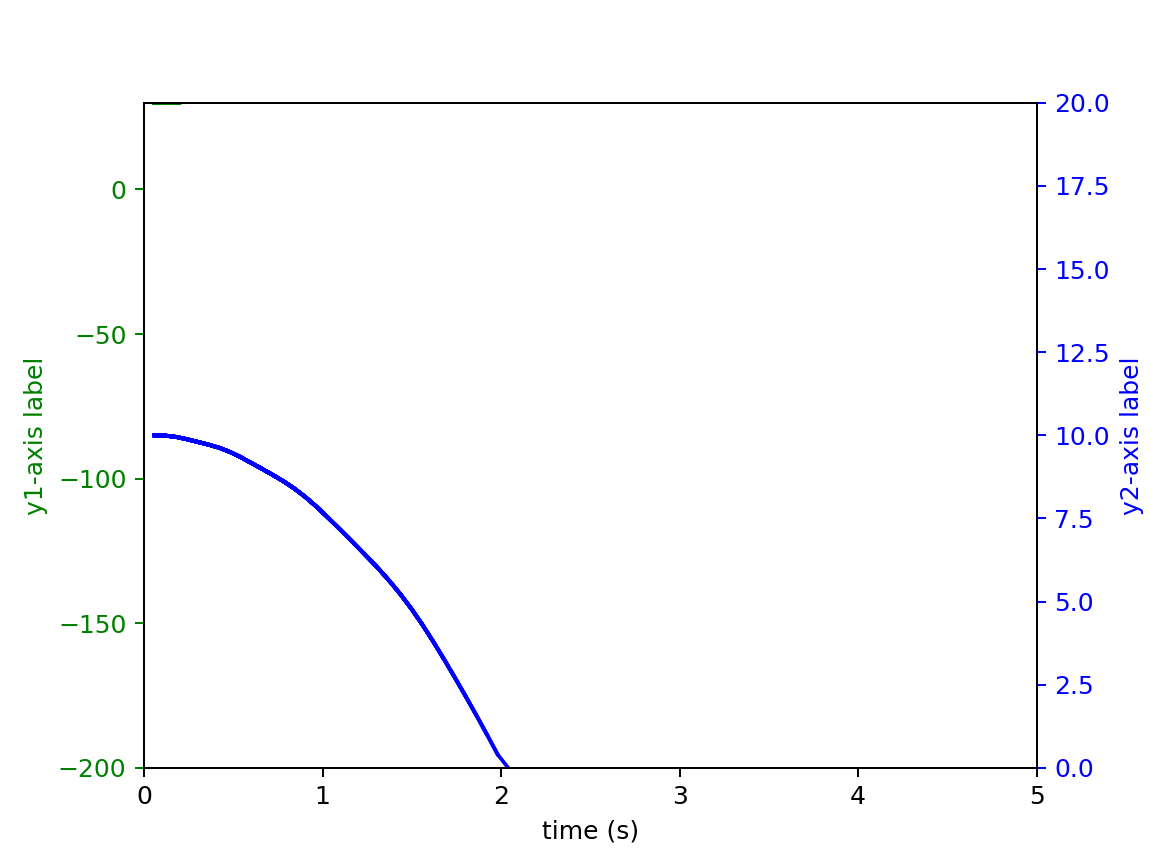

Episode =  180, total reward = 1359.996
Episode =  181, total reward = 1358.865
Episode =  182, total reward = 1362.647
Episode =  183, total reward = 1312.932
Episode =  184, total reward = 1315.448
Episode =  185, total reward = 1361.577
Episode =  186, total reward = 1359.738
Episode =  187, total reward = 1367.314
Episode =  188, total reward = 1358.737
Episode =  189, total reward = 1361.537
Episode =  190, total reward = 1356.733
Episode =  191, total reward = 1363.904
Episode =  192, total reward = 1276.377
Episode =  193, total reward = 1363.323
Episode =  194, total reward = 1359.685
Episode =  195, total reward = 1366.500
Episode =  196, total reward = 1360.052
Episode =  197, total reward = 1359.581
Episode =  198, total reward = 1363.231
Episode =  199, total reward = 1362.468


<IPython.core.display.Javascript object>


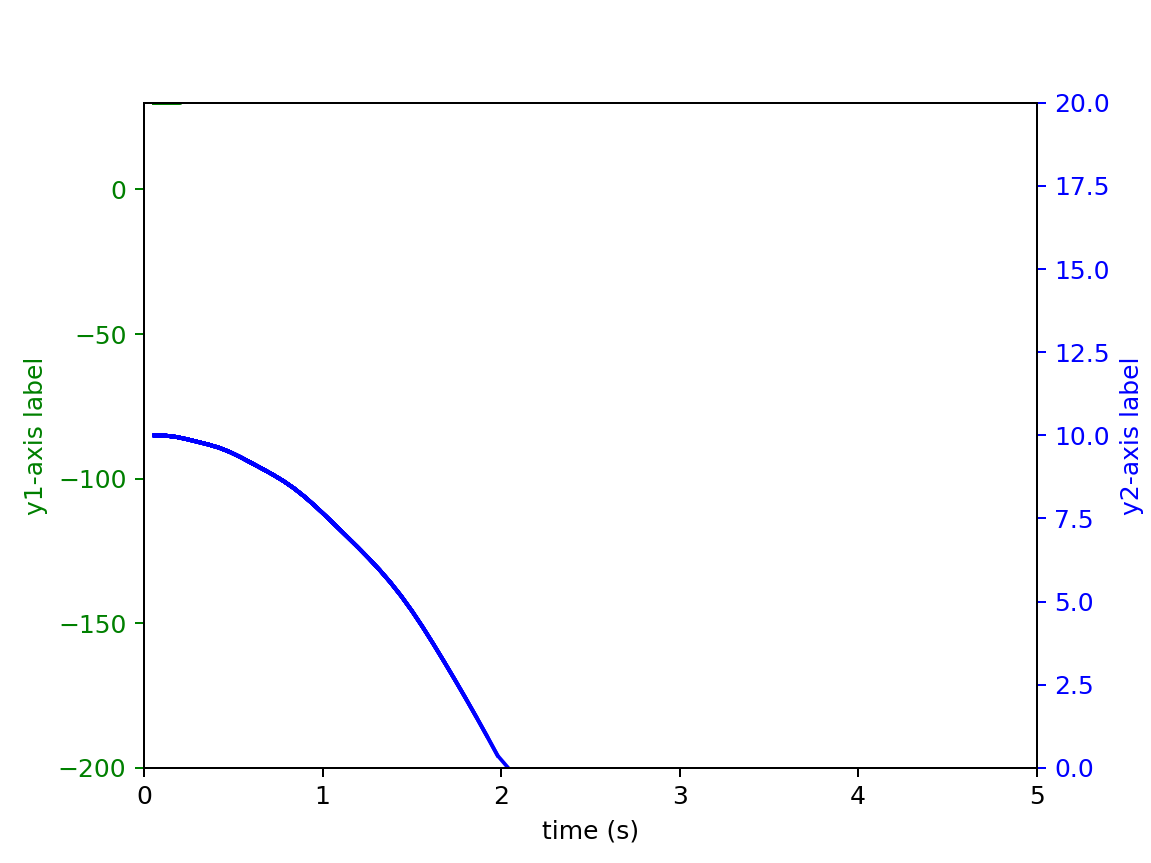

Episode =  200, total reward = 1361.650
Episode =  201, total reward = 1361.988
Episode =  202, total reward = 1363.171
Episode =  203, total reward = 1365.083
Episode =  204, total reward = 1360.582
Episode =  205, total reward = 1366.254
Episode =  206, total reward = 1361.003
Episode =  207, total reward = 1312.032
Episode =  208, total reward = 1362.741
Episode =  209, total reward = 1363.456
Episode =  210, total reward = 1321.606
Episode =  211, total reward = 1044.460
Episode =  212, total reward = 958.136
Episode =  213, total reward = 1001.657
Episode =  214, total reward = 1782.466
Episode =  215, total reward = 934.481
Episode =  216, total reward = 1141.129
Episode =  217, total reward = 1200.538
Episode =  218, total reward = 1102.446
Episode =  219, total reward = 1052.593


<IPython.core.display.Javascript object>


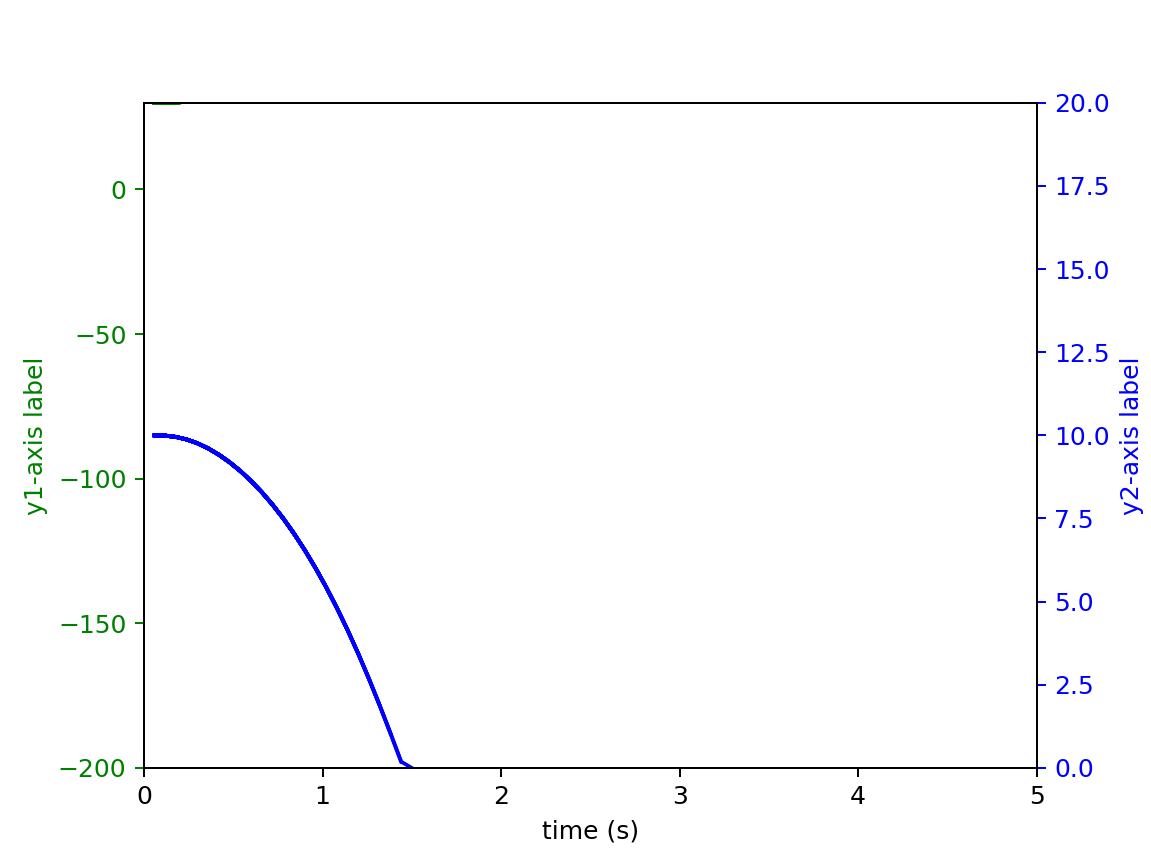

Episode =  220, total reward = 1003.194
Episode =  221, total reward = 1002.857
Episode =  222, total reward = 1002.911
Episode =  223, total reward = 876.955
Episode =  224, total reward = 878.444
Episode =  225, total reward = 888.274
Episode =  226, total reward = 875.129
Episode =  227, total reward = 886.120
Episode =  228, total reward = 931.503
Episode =  229, total reward = 886.992
Episode =  230, total reward = 887.821
Episode =  231, total reward = 830.974
Episode =  232, total reward = 936.201
Episode =  233, total reward = 879.406
Episode =  234, total reward = 881.789
Episode =  235, total reward = 830.180
Episode =  236, total reward = 833.353
Episode =  237, total reward = 884.236
Episode =  238, total reward = 882.172
Episode =  239, total reward = 932.433


<IPython.core.display.Javascript object>


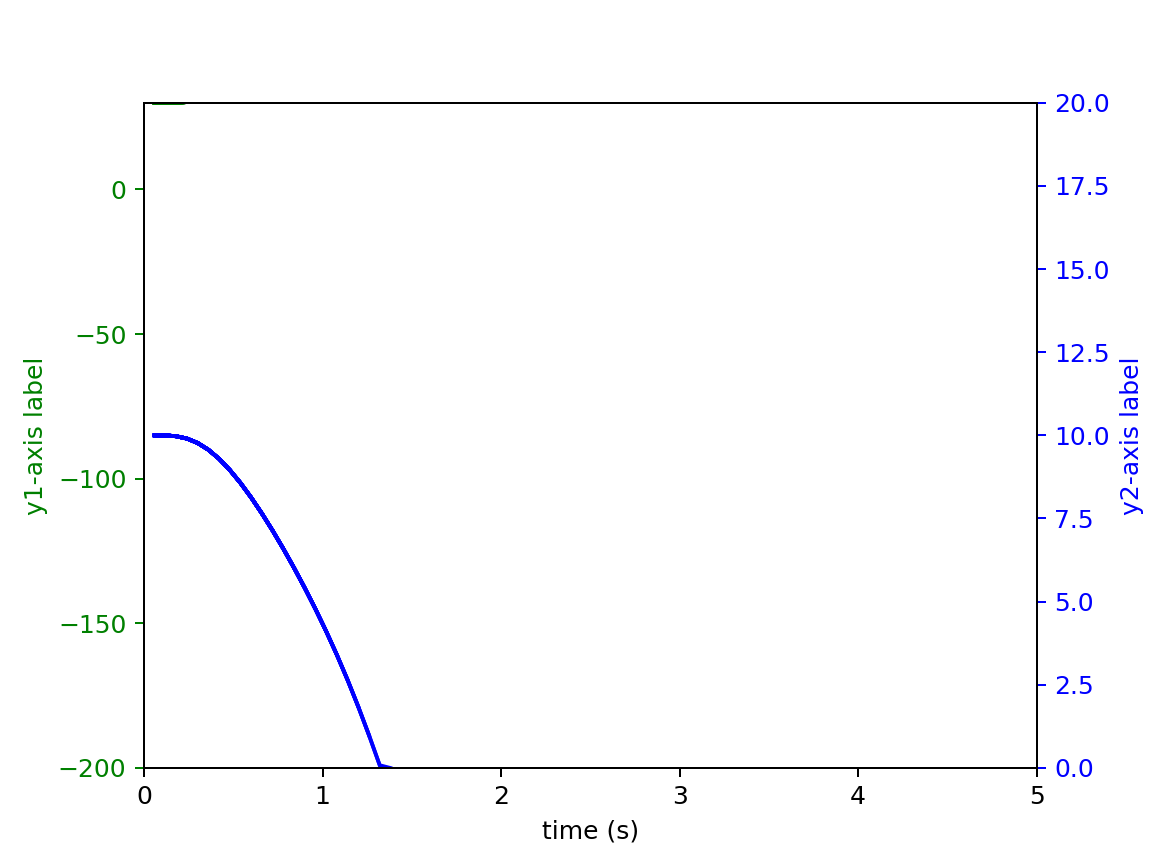

Episode =  240, total reward = 935.375
Episode =  241, total reward = 884.720
Episode =  242, total reward = 878.188
Episode =  243, total reward = 880.976
Episode =  244, total reward = 880.686
Episode =  245, total reward = 2114.581
Episode =  246, total reward = 2243.187
Episode =  247, total reward = 2144.960
Episode =  248, total reward = 2130.117
Episode =  249, total reward = 2512.259
Episode =  250, total reward = 977.568
Episode =  251, total reward = 931.052
Episode =  252, total reward = 1026.307
Episode =  253, total reward = 971.506
Episode =  254, total reward = 982.928
Episode =  255, total reward = 974.235
Episode =  256, total reward = 974.855
Episode =  257, total reward = 926.741
Episode =  258, total reward = 980.557
Episode =  259, total reward = 933.505


<IPython.core.display.Javascript object>


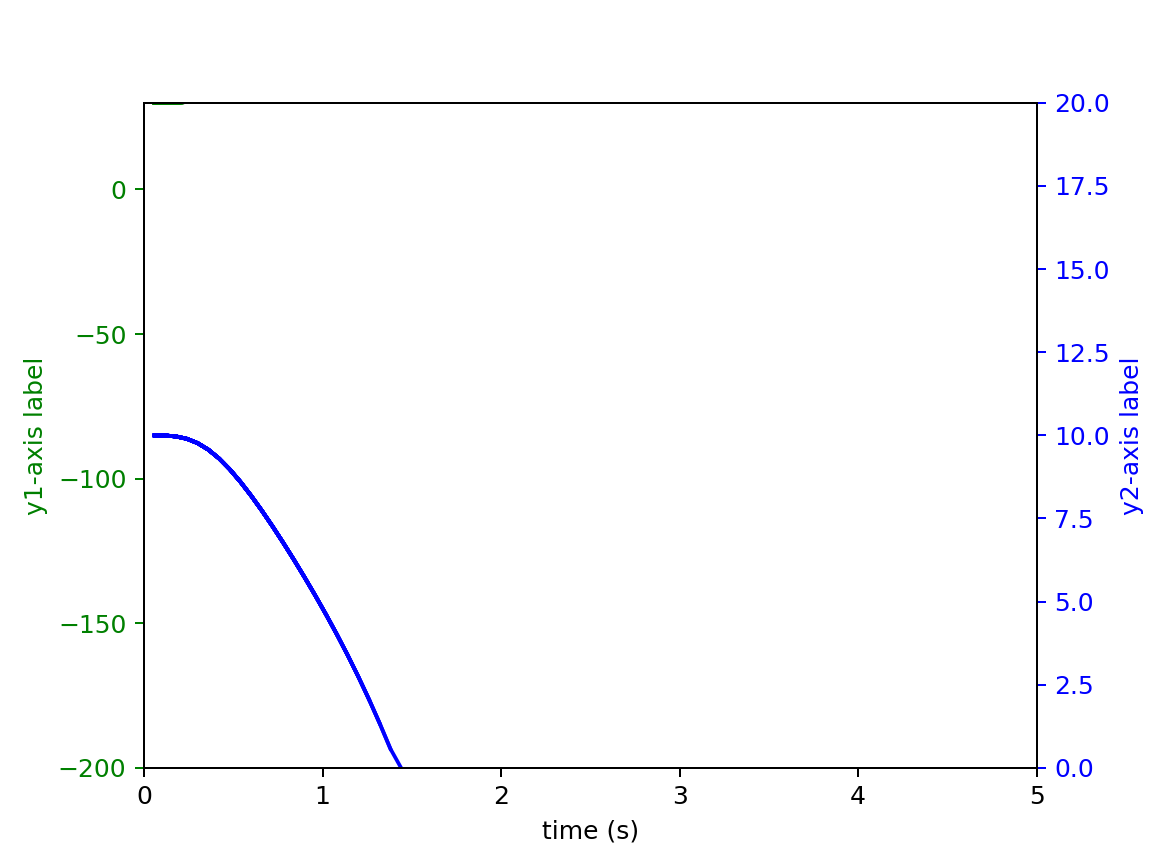

Episode =  260, total reward = 974.251
Episode =  261, total reward = 973.675
Episode =  262, total reward = 976.116
Episode =  263, total reward = 978.787
Episode =  264, total reward = 978.389
Episode =  265, total reward = 981.110
Episode =  266, total reward = 982.868
Episode =  267, total reward = 1024.278
Episode =  268, total reward = 1021.906
Episode =  269, total reward = 975.736
Episode =  270, total reward = 975.779
Episode =  271, total reward = 927.213
Episode =  272, total reward = 977.192
Episode =  273, total reward = 974.926
Episode =  274, total reward = 931.830
Episode =  275, total reward = 930.721
Episode =  276, total reward = 979.365
Episode =  277, total reward = 976.855
Episode =  278, total reward = 977.852
Episode =  279, total reward = 1072.959


<IPython.core.display.Javascript object>


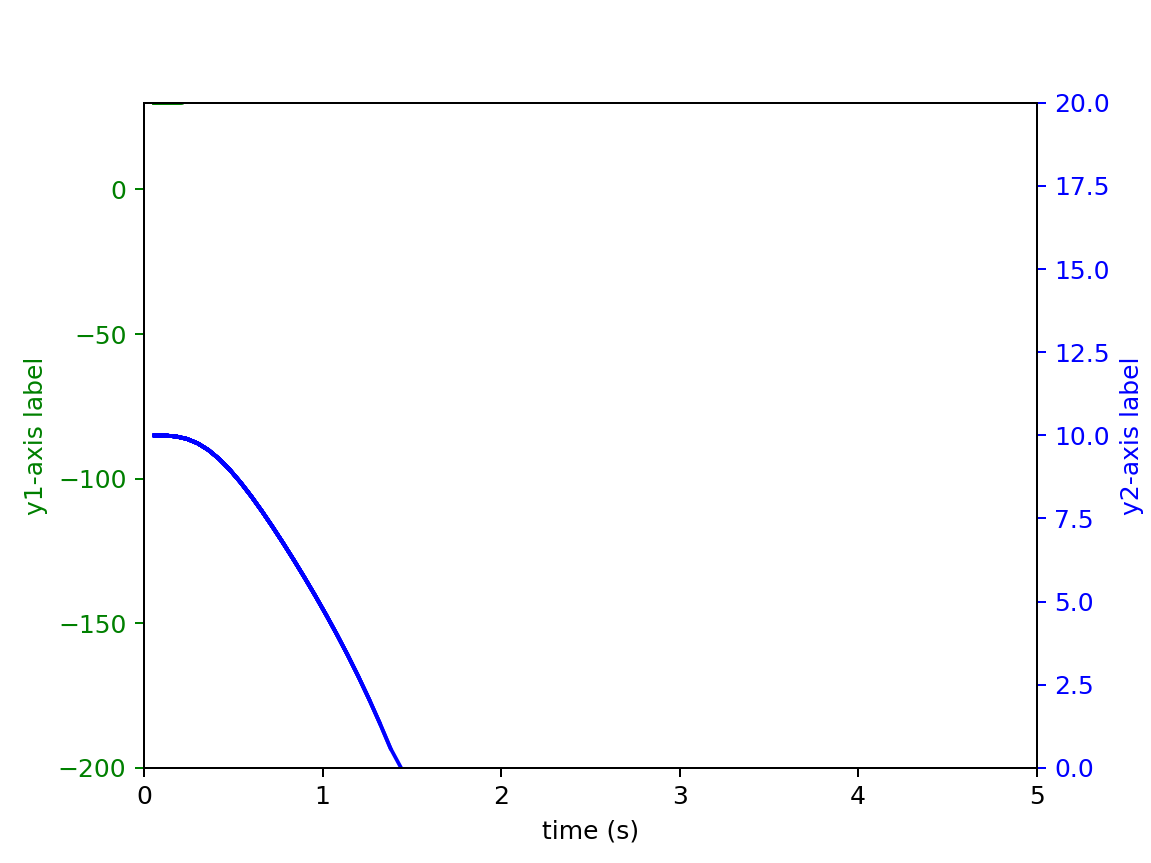

Episode =  280, total reward = 974.475
Episode =  281, total reward = 932.476
Episode =  282, total reward = 983.511
Episode =  283, total reward = 979.368
Episode =  284, total reward = 976.721
Episode =  285, total reward = 982.778
Episode =  286, total reward = 987.184
Episode =  287, total reward = 928.156
Episode =  288, total reward = 979.184
Episode =  289, total reward = 985.612
Episode =  290, total reward = 1031.306
Episode =  291, total reward = 923.737
Episode =  292, total reward = 927.237
Episode =  293, total reward = 979.916
Episode =  294, total reward = 981.622
Episode =  295, total reward = 978.172
Episode =  296, total reward = 980.561
Episode =  297, total reward = 1032.583
Episode =  298, total reward = 979.614
Episode =  299, total reward = 926.843


<IPython.core.display.Javascript object>


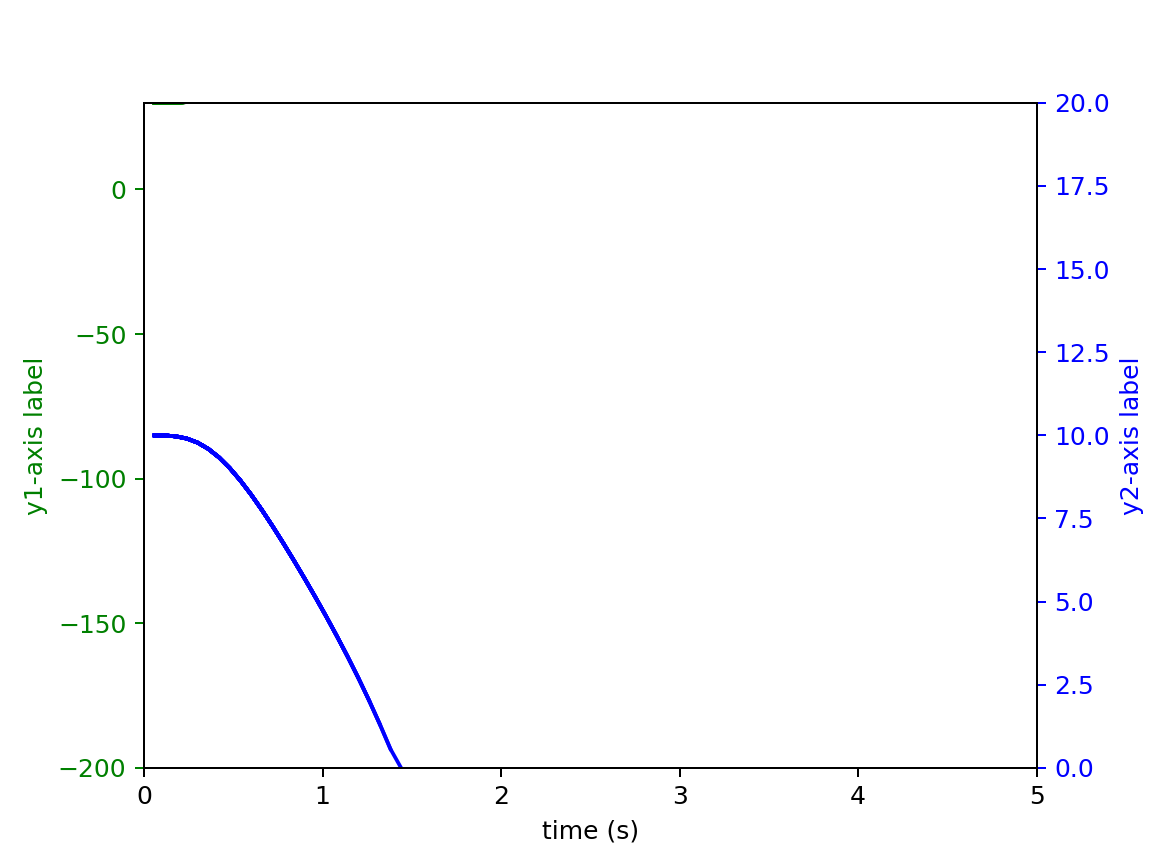

Episode =  300, total reward = 974.624


In [2]:
# you must include '%matplotlib notebook' for this to work
%matplotlib notebook

import sys
import numpy as np
import pandas as pd
from agents.agent import DDPG
from task import Task

num_episodes = 300
init_pose = [0., 0., 10., 0., 0., 0.]
init_velocities = [0., 0., 0.]
init_angle_velocities = [0., 0., 0.]
target_pos = np.array([0., 0., 20.])
task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities,target_pos=target_pos)
agent = DDPG(task) 

total_rewards = []

display_freq = 20
display_step_freq = 10

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    
    display_graph = i_episode % display_freq == 0
    if display_graph:
        # prior to the start of each episode, clear the datapoints
        x, y1, y2 = [], [], []    
        fig, sub1, sub2 = plt_init()

    total_reward = 0
    step = 0
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        step += 1
        # within the episode loop
        if display_graph:
            x.append(task.sim.time) # time
            y1.append(reward) # y-axis 1 values
            y2.append(task.sim.pose[2]) # y-axis 2 values
            
            #if step % display_step_freq == 0:
            plt_dynamic(fig, sub1, sub2, x, y1, y2)
        if done:
            print("\rEpisode = {:4d}, total reward = {:7.3f}".format(
                i_episode, total_reward))  # [debug]
            total_rewards.append(total_reward)
            break


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

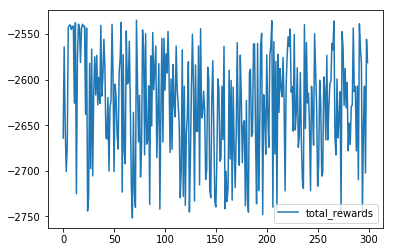

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(total_rewards)),  total_rewards, label='total_rewards')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: